In [119]:
# Reduce loading of auto fill for jupyter lab
%config Completer.use_jedi = False

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [121]:
# Matplotlib settings

# Make matplotlib images appear inline in code
%matplotlib inline

# Global plot settings
d ={
    'axes.titlesize': 22,
    'axes.titleweight': 550,
    'axes.titlepad': 20,
    'axes.labelsize': 16,
    'axes.labelweight': 550,
    'axes.labelpad': 20,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
}

# Update settings with settings dictionary
plt.rcParams.update(d)

In [122]:
def figure_elements(x_size, y_size,
                    title=None, x_label=None,
                    y_label=None, grid_on=False
                   ):
    
    fig, ax = plt.subplots()
    
    # Set figure size
    fig.set_size_inches(x_size, y_size)
    
    # set a title and labels
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # Set a dashed grid background for plots
    if grid_on is True:
        ax.grid(color='gray', linestyle='dashed')
        ax.set_axisbelow(True)
    
    return(fig, ax)

In [123]:
# Data sets
covid_data = pd.read_csv('data/covid_data.csv', index_col=0)
chess_games = pd.read_csv('data/games.csv', index_col=0)

In [124]:
# Filter the covid_data data set by date, existance of continent field
# and ignore rows that have negative deaths recorded
covid_curr = covid_data[(covid_data['date'] == '2020-05-19') &
                        (~covid_data['continent'].isna()) &
                        (covid_data['new_deaths_per_million'] > 0)]

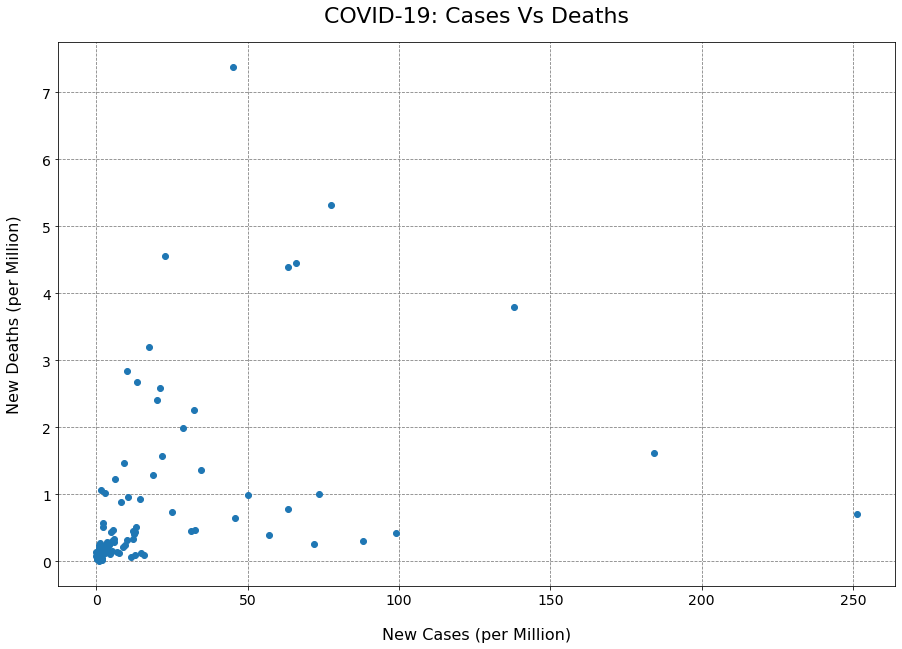

In [125]:
fig, ax = figure_elements(15, 10, 
                          'COVID-19: Cases Vs Deaths', 
                          'New Cases (per Million)', 
                          'New Deaths (per Million)',
                          grid_on=True
                         )

ax.scatter(covid_curr['new_cases_per_million'], covid_curr['new_deaths_per_million'])

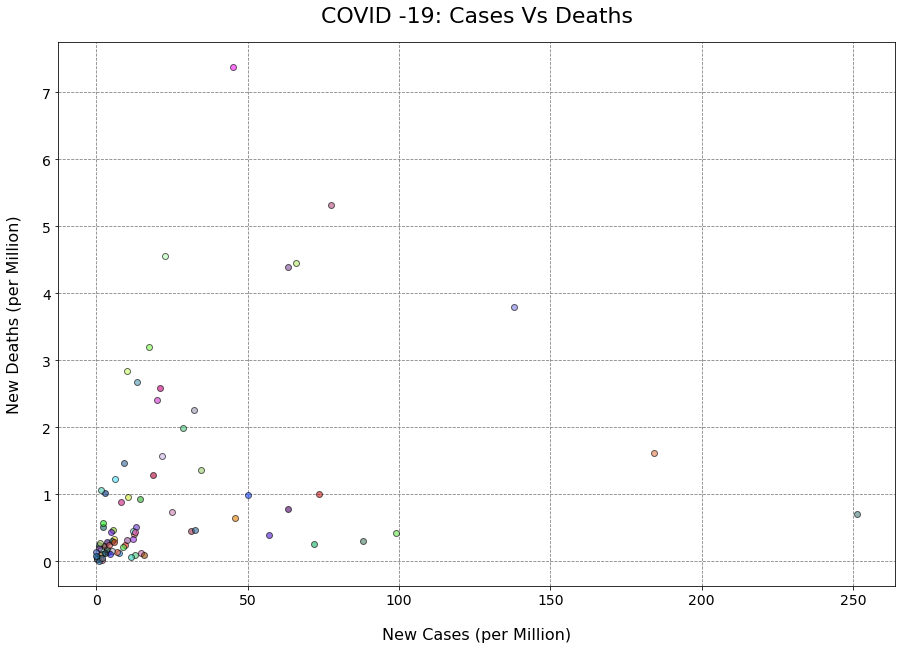

In [126]:
fig, ax = figure_elements(15, 10, 
                          'COVID -19: Cases Vs Deaths', 
                          'New Cases (per Million)', 
                          'New Deaths (per Million)',
                          grid_on=True
                         )

df_len = len(covid_curr)

# List of random, non-repeating, RGB colours
colour_list = np.random.rand(df_len,3).round(1)

# plot each data-point with a randomly generated RGB colour
for i in range(df_len):
    ax.scatter(covid_curr['new_cases_per_million'][i],
               covid_curr['new_deaths_per_million'][i],
               color=colour_list[i],
               alpha=0.6,
               edgecolors='black'
              )

In [127]:
# Only covid data for UK, drop no continent rows, and also any negative
# deaths
covid_to_date = covid_data[(covid_data['location'] == 'United Kingdom') &
                           (~covid_data['continent'].isna()) &
                           (covid_data['new_deaths_per_million'] > 0)]

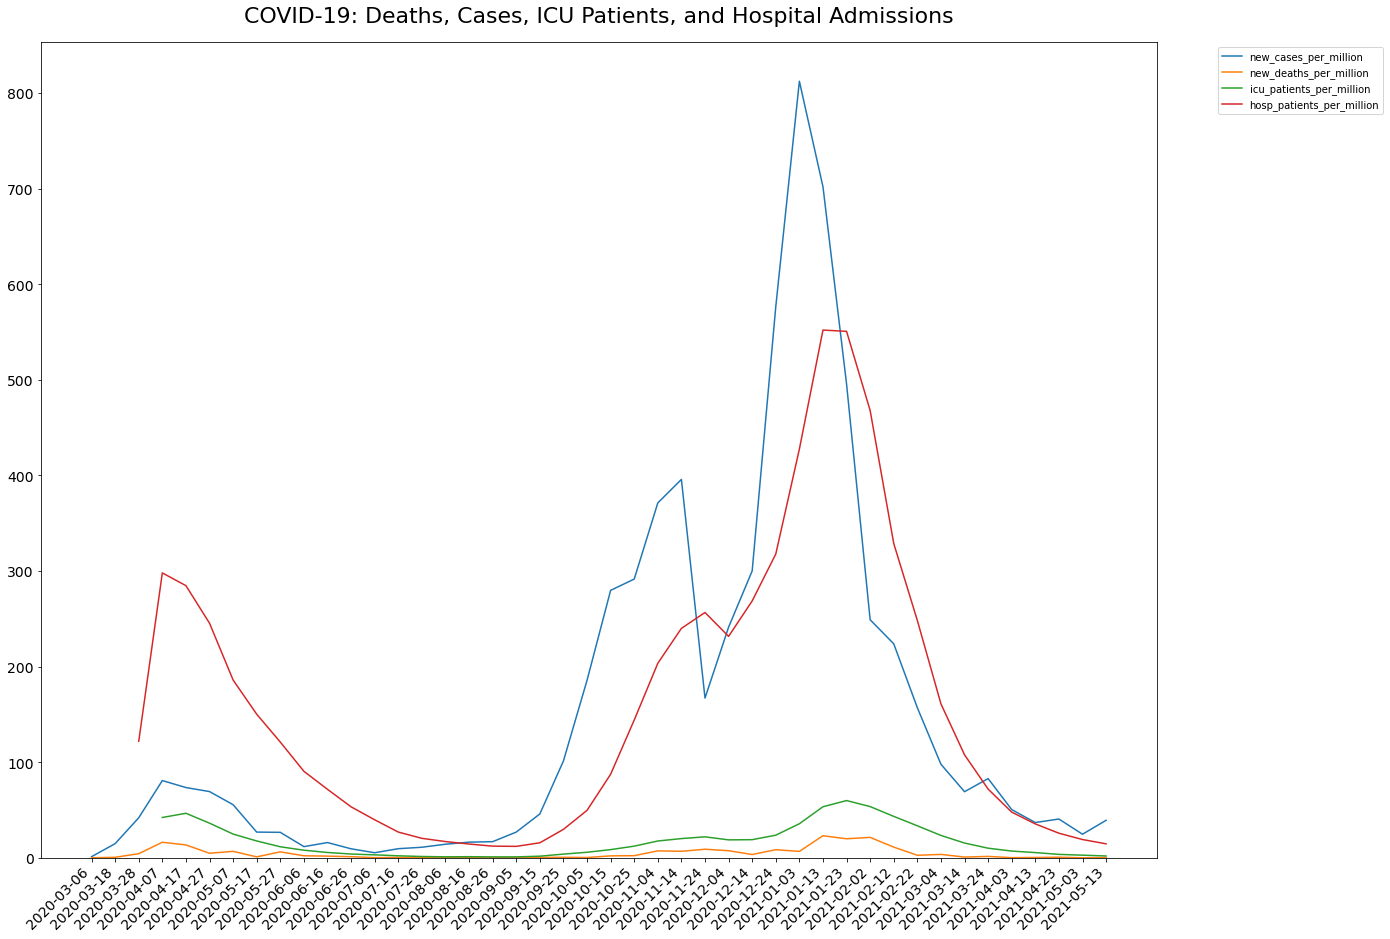

In [128]:
# columns to plot
columns = ['new_cases_per_million',
           'new_deaths_per_million',
           'icu_patients_per_million',
           'hosp_patients_per_million']

# create x data
x_data = covid_to_date['date'].values[0::10]

fig, ax = figure_elements(20, 15, 'COVID-19: Deaths, Cases, ICU Patients, and Hospital Admissions')

# plot each column
for column in columns:
    ax.plot(x_data, covid_to_date[column][0::10], label=column)

# ax.set_xlim((0, len(x_data)-1))
ax.set_ylim(bottom=0)

# set title and legend
plt.xticks(rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')

In [129]:
# Filter to get only high rated games
high_rated = chess_games[(chess_games['rated'] == True) &
                         (chess_games['black_rating'] > 2000) &
                         (chess_games['white_rating'] > 2000)]

(array([ 94., 336., 203.,  87.,  28.,   7.,   2.,   0.,   0.,   2.]),
 array([  2. ,  36.7,  71.4, 106.1, 140.8, 175.5, 210.2, 244.9, 279.6,
        314.3, 349. ]),
 <BarContainer object of 10 artists>)

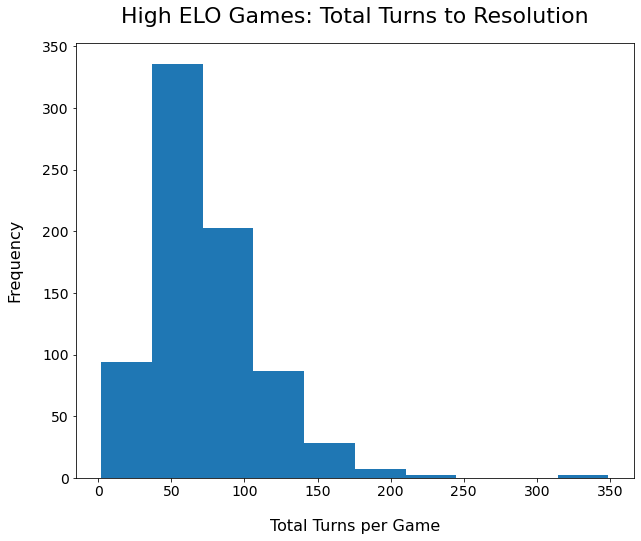

In [130]:
fig, ax = figure_elements(10, 8,
                         'High ELO Games: Total Turns to Resolution',
                         'Total Turns per Game',
                         'Frequency'
                         )

# plot histogram
ax.hist(high_rated['turns'])

In [131]:
# Most played openings in the highest rated games
openings = high_rated['opening_name'].value_counts()
top_openings = openings[openings > 4].sort_index()

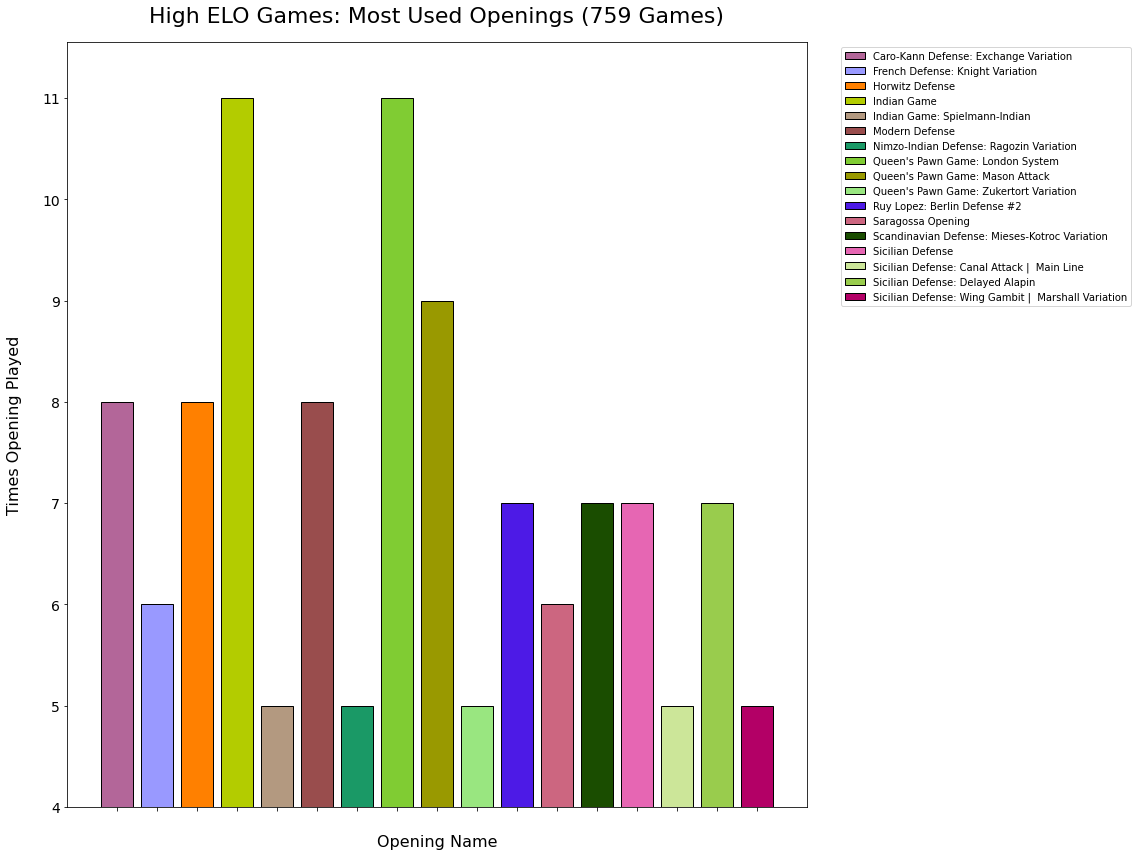

In [156]:
fig, ax = figure_elements(16, 12, 
                          f'High ELO Games: Most Used Openings ({len(high_rated)} Games)',
                          'Opening Name',
                          'Times Opening Played'
                         )

# get x and y data
points = top_openings.index
frequency = top_openings.values

# List of random, non-repeating, RGB colours
colour_list = np.random.rand(df_len,3).round(1)

for i in range(len(points)):
    ax.bar(points[i],
           frequency[i],
           color=colour_list[i],
           edgecolor='black'
          )
    
ax.set_xticklabels([])
ax.set_ylim(bottom=4)

# Move legend outside of the plot
plt.legend(points, bbox_to_anchor=(1.04, 1), loc='upper left')
plt.tight_layout()
    
plt.show()

<AxesSubplot:title={'center':'High ELO: Rating Disparity'}, xlabel='black_rating', ylabel='white_rating'>

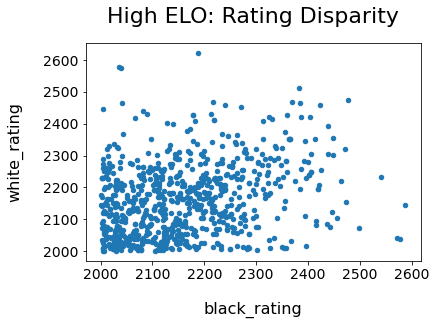

In [133]:
high_rated.plot.scatter(x='black_rating', y='white_rating', title='High ELO: Rating Disparity')

In [134]:
cov_columns = covid_to_date.columns
cov_columns = [x for x in cov_columns if x not in ['total_deaths_per_million', 'total_cases_per_million', 'date']]

<AxesSubplot:title={'center':'COVID-19: UK Deaths and Cases'}, xlabel='date'>

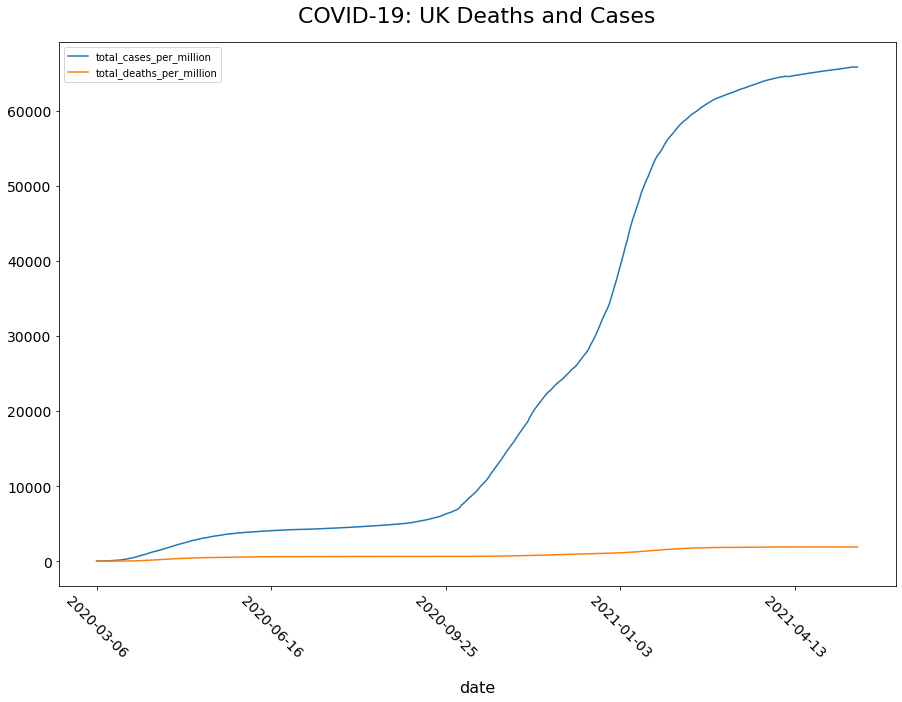

In [135]:
fig, ax = figure_elements(15, 10)
covid_to_date.drop(cov_columns, axis=1).plot.line(ax=ax, x='date', title='COVID-19: UK Deaths and Cases', rot=-45)

<AxesSubplot:title={'center':'High ELO Games: Turns Per Game'}, ylabel='Frequency'>

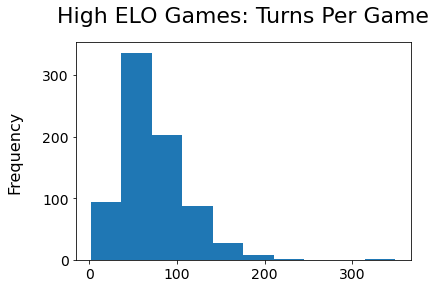

In [136]:
high_rated['turns'].plot.hist(title='High ELO Games: Turns Per Game')

In [137]:
chess_columns = high_rated.columns
chess_columns = [x for x in chess_columns if x not in ['black_rating', 'white_rating']]

array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>]], dtype=object)

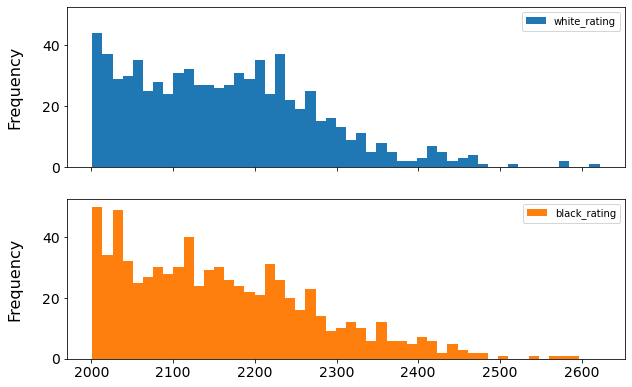

In [138]:
high_rated.drop(chess_columns, axis=1).plot.hist(subplots=True, layout=(3,1), figsize=(10,10), bins=50, sharey=True)

(6.0, 11.55)

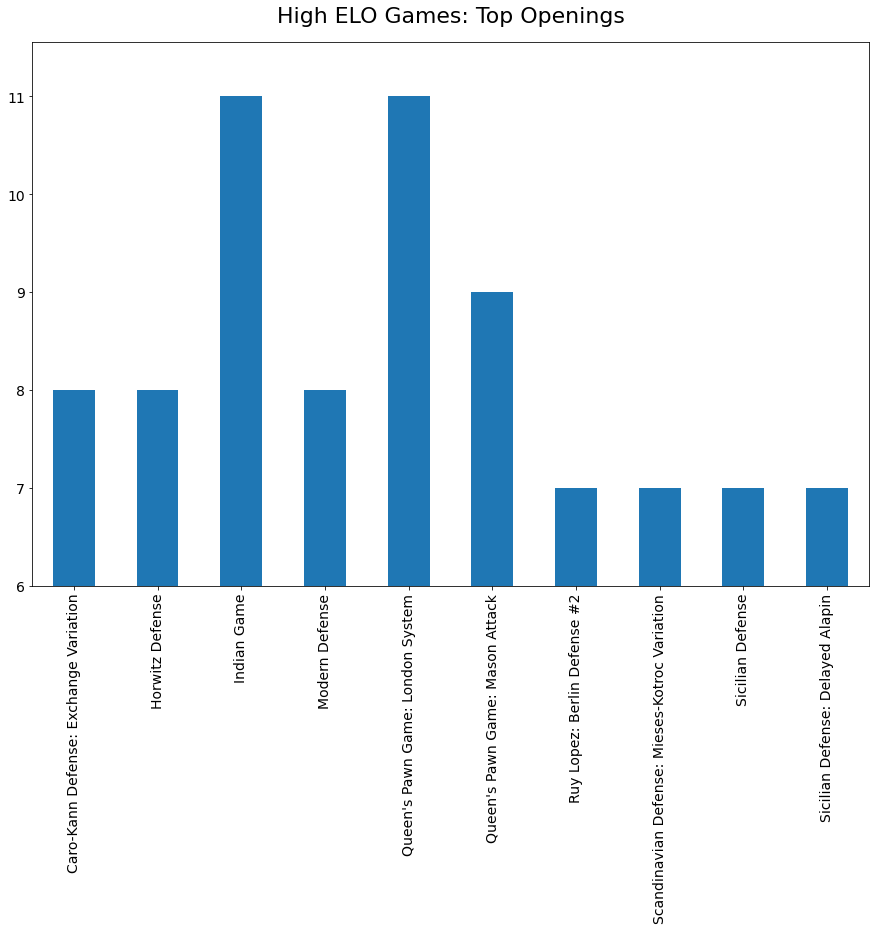

In [139]:
fig, ax = figure_elements(15,10)
high_rated['opening_name'].value_counts()[:10].sort_index().plot.bar(title='High ELO Games: Top Openings')
ax.set_ylim(6)

(6.0, 11.55)

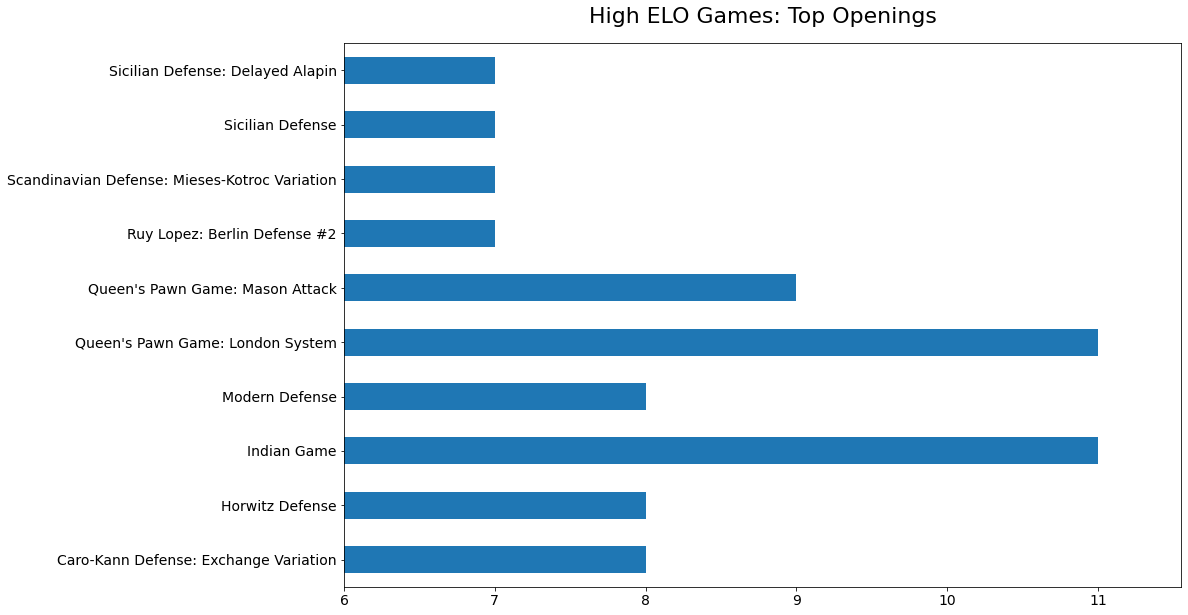

In [140]:
fig, ax = figure_elements(15,10)
high_rated['opening_name'].value_counts()[:10].sort_index().plot.barh(title='High ELO Games: Top Openings')
ax.set_xlim(6)

(140.0, 366.45)

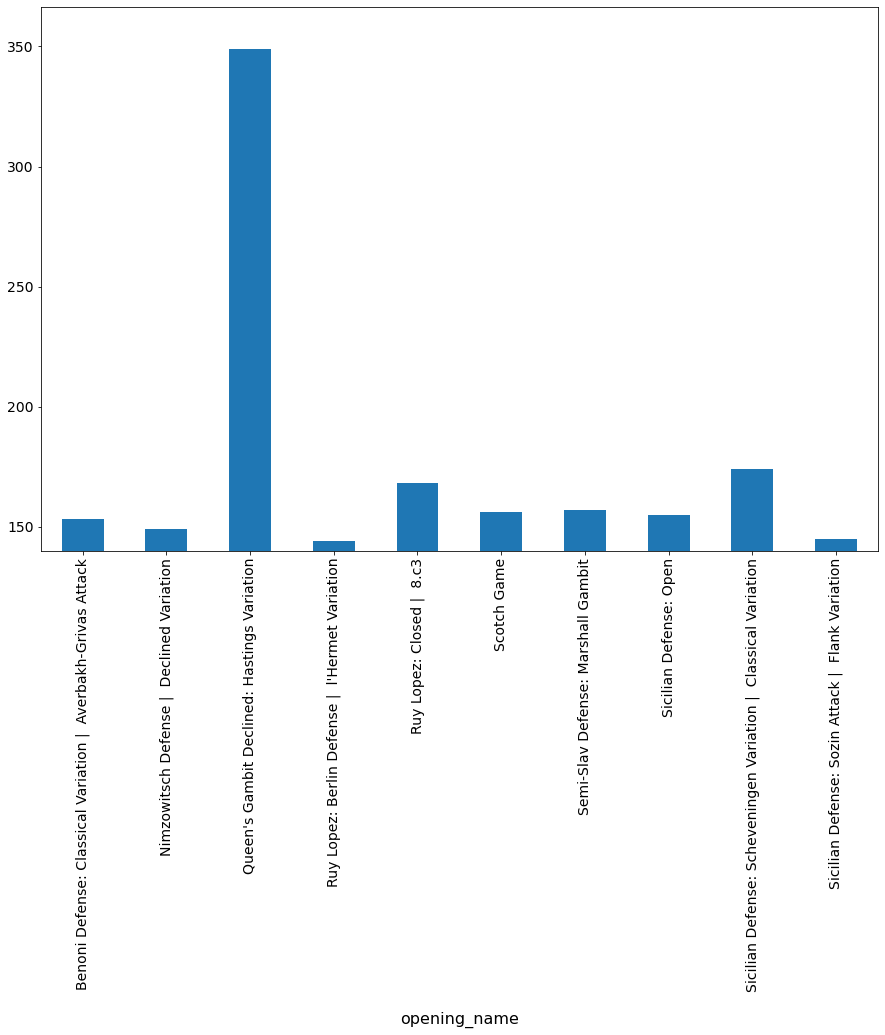

In [141]:
fig, ax = figure_elements(15,10)
high_rated.groupby('opening_name').turns.mean().sort_values(ascending=False)[:10].sort_index().plot.bar()
ax.set_ylim(140)

<AxesSubplot:xlabel='new_cases_per_million', ylabel='new_deaths_per_million'>

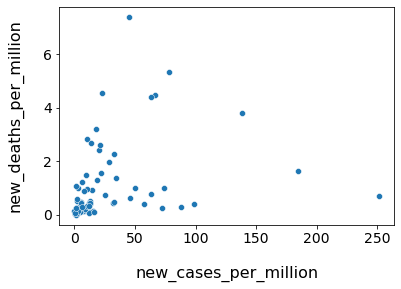

In [142]:
sns.scatterplot(x='new_cases_per_million', y='new_deaths_per_million', data=covid_curr)

<AxesSubplot:xlabel='new_cases_per_million', ylabel='new_deaths_per_million'>

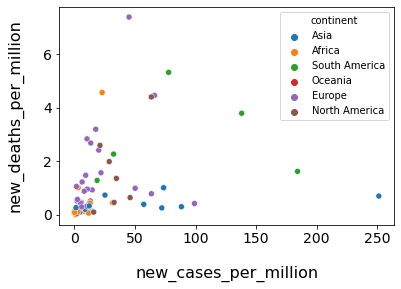

In [143]:
sns.scatterplot(x='new_cases_per_million', y='new_deaths_per_million', data=covid_curr, hue='continent')

In [144]:
covid_pivot = covid_to_date.pivot('date', 'location', ['new_deaths_per_million', 'new_cases_per_million'])

C:\Users\kiddd\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


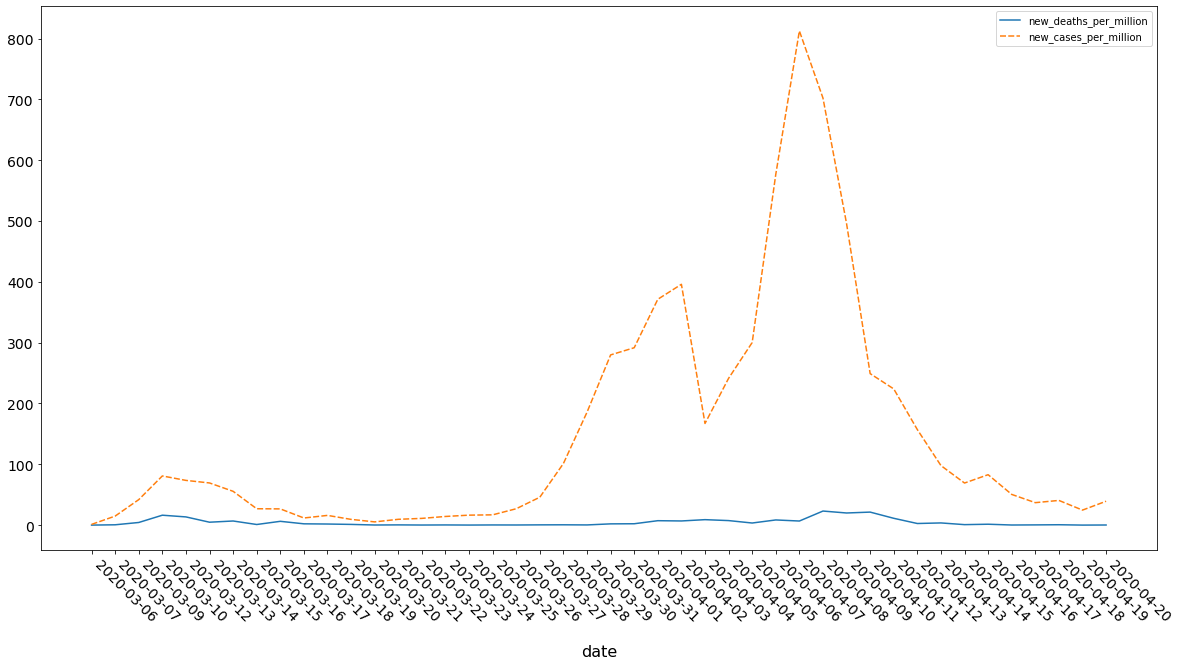

In [145]:
fig, ax = figure_elements(20,10)
sns.lineplot(ax=ax, data=covid_pivot[0::10])
ax.set_xticklabels(covid_to_date['date'], rotation=-45, ha='left')

plt.show()

<AxesSubplot:title={'center':'High ELO Games: Turns per Game'}, xlabel='turns', ylabel='Count'>

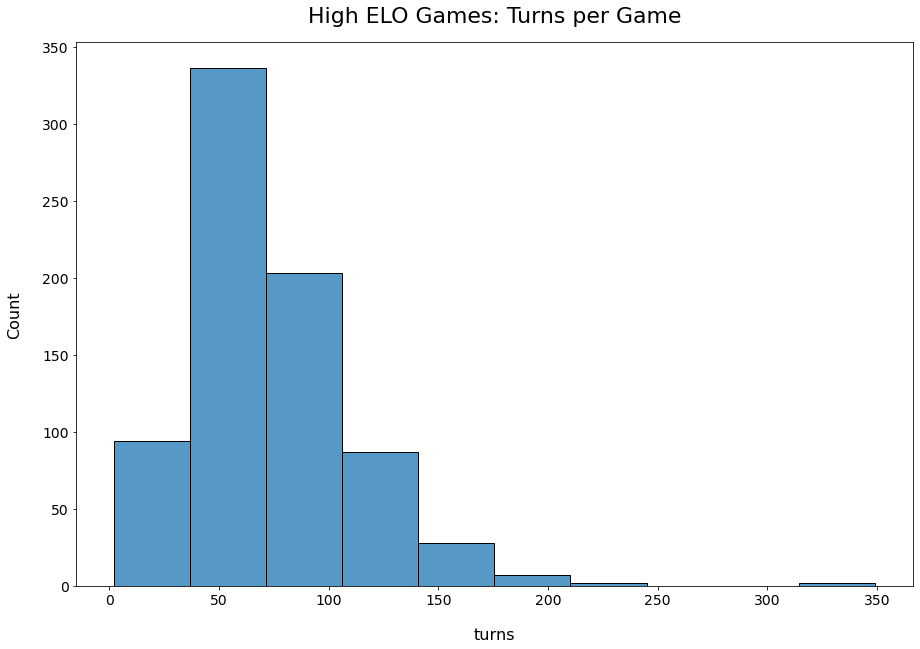

In [146]:
fig, ax = figure_elements(15,10, 'High ELO Games: Turns per Game')
sns.histplot(high_rated['turns'], bins=10, kde=False, ax=ax)

<AxesSubplot:title={'center':'High ELO Games: Turns per Game'}, xlabel='turns', ylabel='Count'>

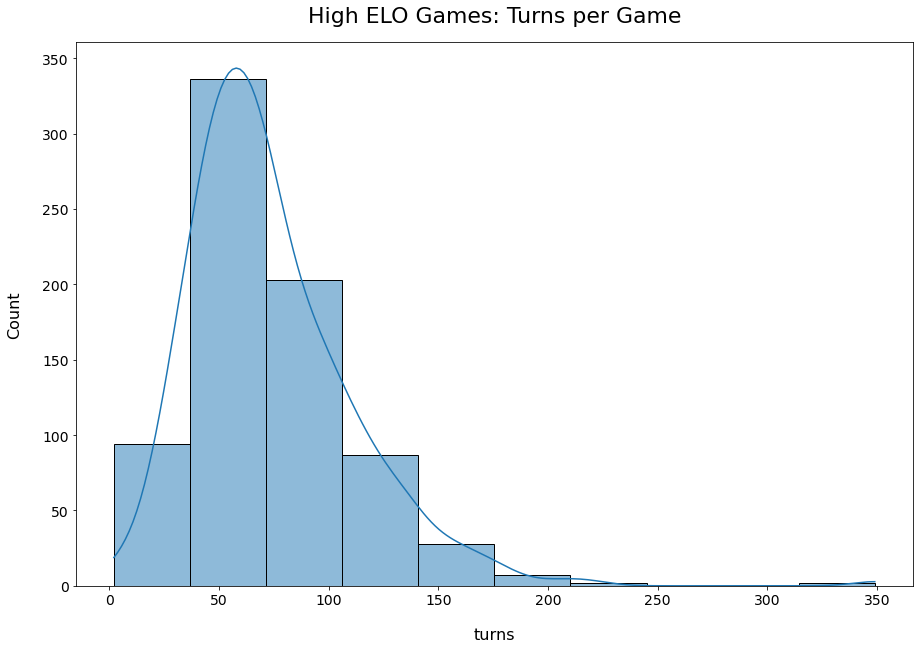

In [147]:
fig, ax = figure_elements(15,10,
                          'High ELO Games: Turns per Game'
                         )

sns.histplot(high_rated['turns'], bins=10, kde=True, ax=ax)

In [148]:
# Reduce opening variant names to most common root.
def opening_root(x):
    m = re.match(r'(.+?):|(.+?).\|', x)
    if m is not None:
        try:
            return m.group(1)
        except Exception as e:
            return m.group(2)

In [149]:
high_rated['re_openings'] = high_rated['opening_name'].apply(lambda x: opening_root(x))

C:\Users\kiddd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


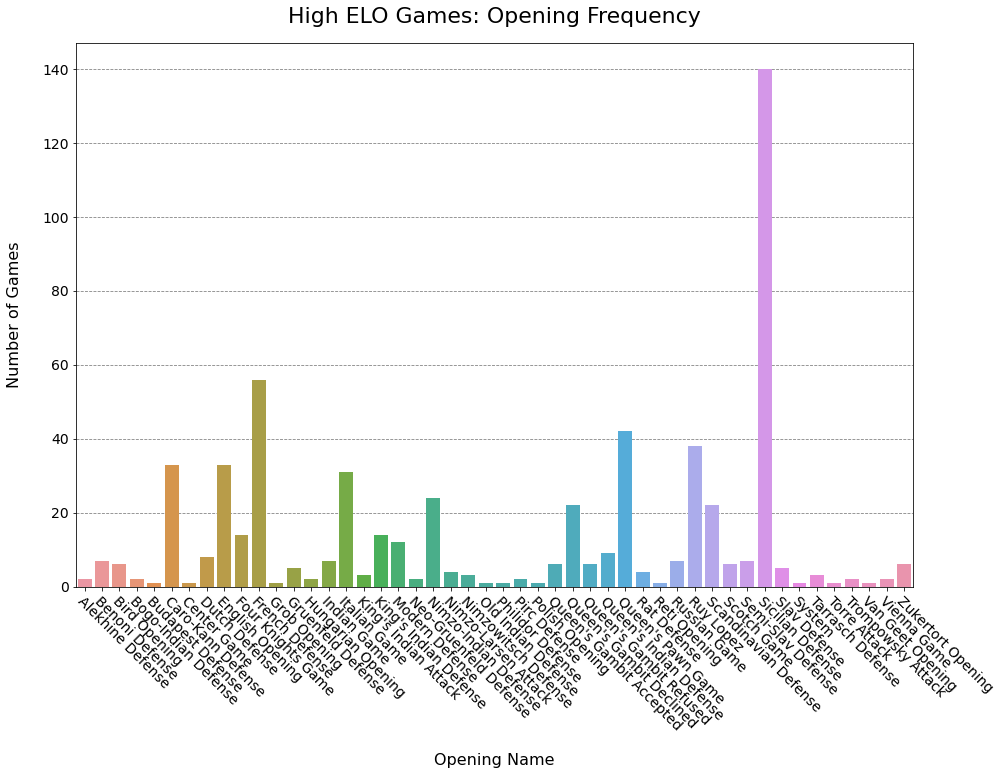

In [150]:
fig, ax = figure_elements(15,10,
                          'High ELO Games: Opening Frequency',
                          grid_on=True
                         )
sns.countplot(x=high_rated['re_openings'].sort_values(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left', rotation_mode='anchor')

ax.set_xlabel('Opening Name')
ax.set_ylabel('Number of Games')

plt.show()

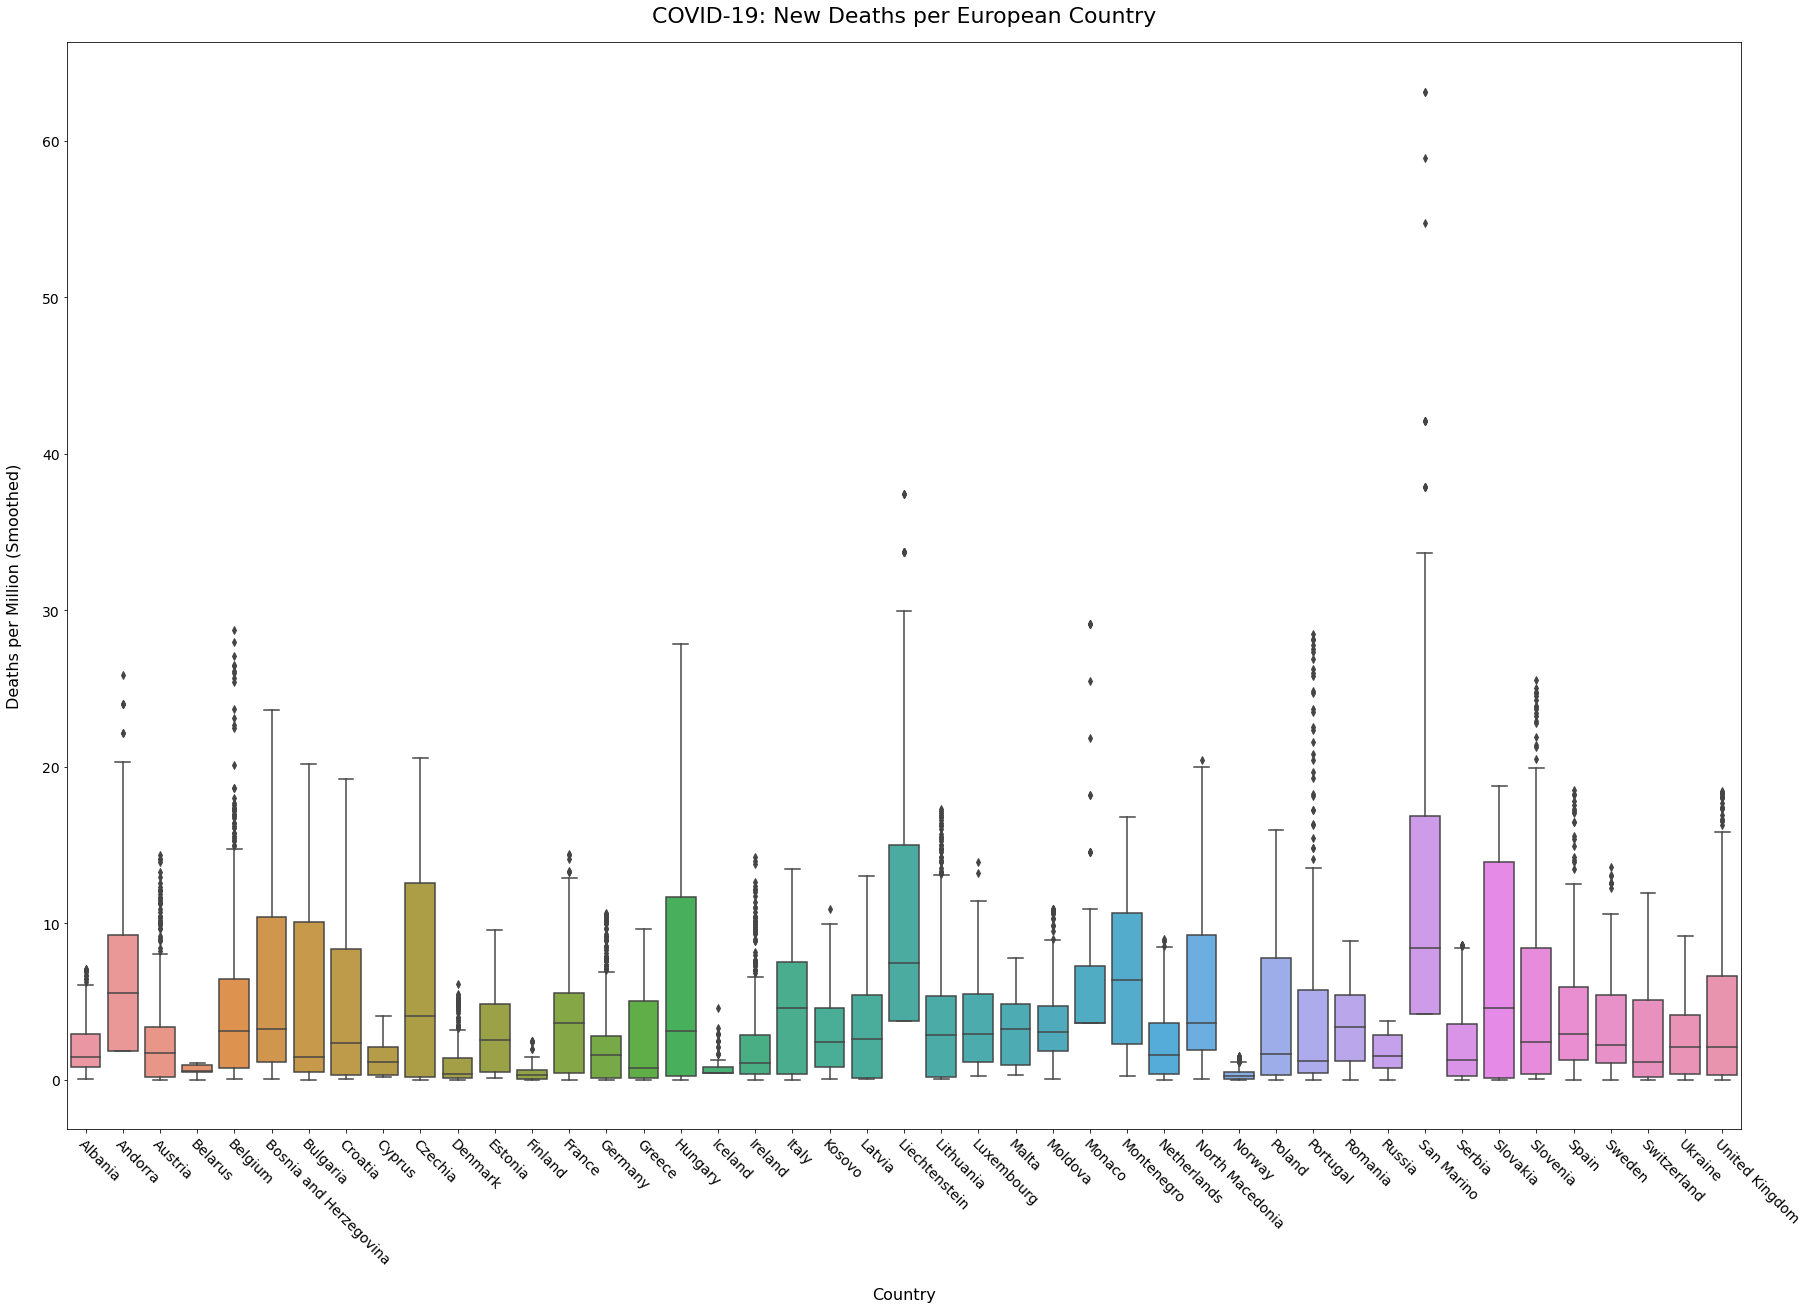

In [151]:
df = covid_data[(covid_data['continent'] == 'Europe') &
                (covid_data['new_deaths_smoothed_per_million'] > 0)
               ]

fig, ax = figure_elements(30, 20)

sns.boxplot(x='location', y='new_deaths_smoothed_per_million', data=df, ax=ax, )

ax.set_title('COVID-19: New Deaths per European Country')
ax.set_ylabel('Deaths per Million (Smoothed)')
ax.set_xlabel('Country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, rotation_mode='anchor', ha='left')

plt.show()

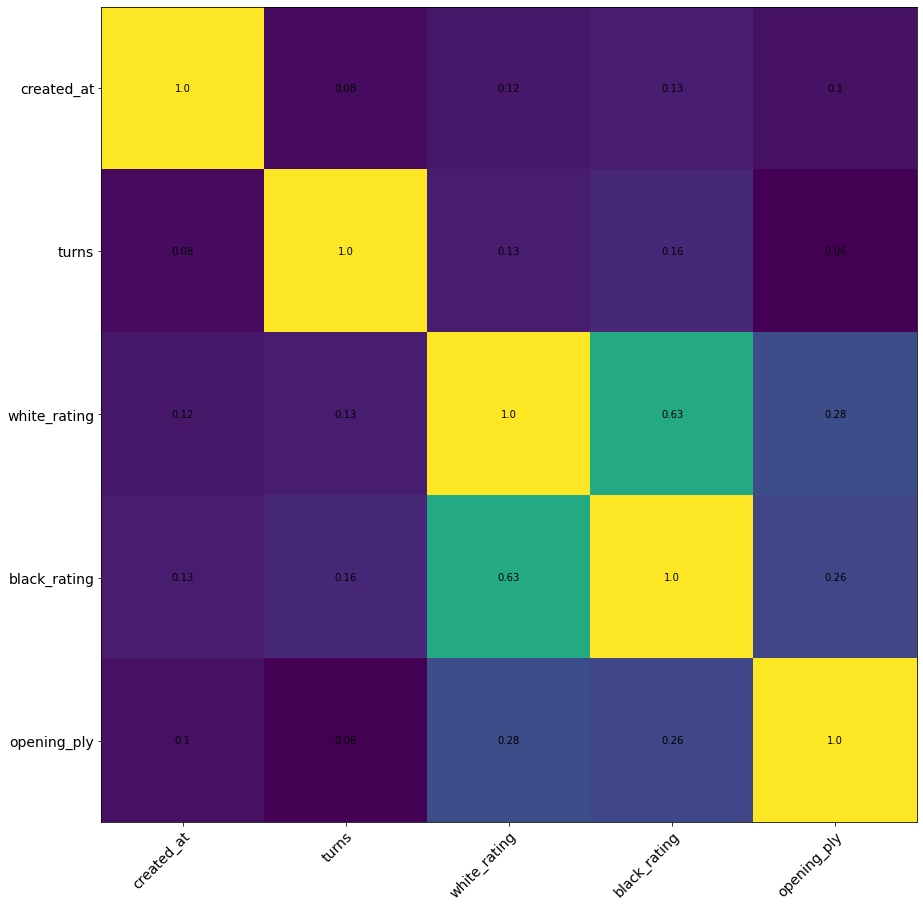

In [152]:
# get correlation matrix
corr = chess_games.drop(['rated', 'last_move_at'], axis=1).corr()
fig, ax = figure_elements(15,15)

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

<AxesSubplot:>

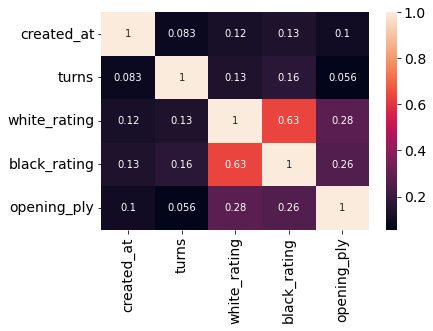

In [153]:
sns.heatmap(chess_games.drop(['rated', 'last_move_at'], axis=1).corr(), annot=True)

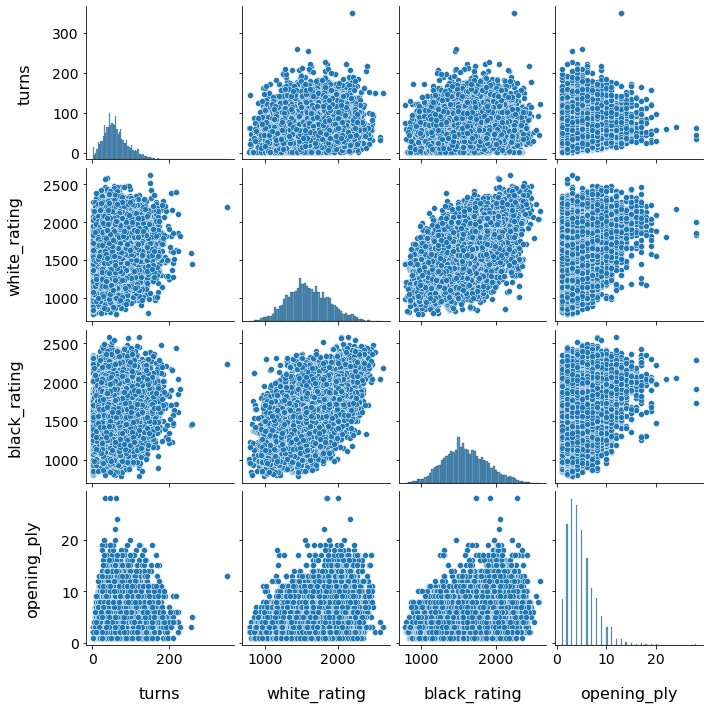

In [154]:
df = chess_games[chess_games['rated'] == True]
df.reset_index(inplace=True)
sns.pairplot(df.drop(['rated', 'last_move_at', 'id', 'created_at'], axis=1))